In [1]:
import pandas as pd
df = pd.read_csv("c:/data/pima/data.csv")
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X=df[df.columns[:-1]]
y=df['outcome']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=0)

In [12]:

from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model1.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

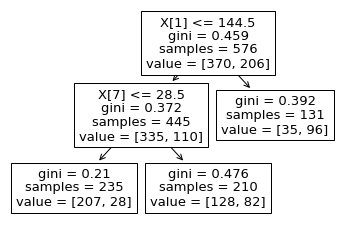

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
#plt.figure(figsize=(9,6))
tree.plot_tree(model1)
plt.show()
# value=[207,28] 0,1 샘플 갯수

In [14]:
from sklearn.tree import export_text
#의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력
tree_rules = export_text(model1,feature_names=list(X_train.columns))
print(tree_rules)

|--- glucose <= 144.50
|   |--- age <= 28.50
|   |   |--- class: 0
|   |--- age >  28.50
|   |   |--- class: 0
|--- glucose >  144.50
|   |--- class: 1



In [17]:
# tree_ : 트리의 루트 노드
n_nodes = model1.tree_.node_count
print(' 노드 갯수:',n_nodes) 
threshold = model1.tree_.threshold
print(' 노드의 임계값:',threshold)

 노드 갯수: 5
 노드의 임계값: [144.5  28.5  -2.   -2.   -2. ]


In [18]:
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.7482638888888888
0.75
